In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, GenericUnivariateSelect,SelectPercentile, chi2,f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



C:\Users\vatsa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\vatsa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df =pd.read_csv('survey_dataset.csv')

df.head()

,Country of Origin,University major,Gender,Age,Height (inches),Weight (lbs),How many siblings do you have?,Marital status,GPA (e.g. undergraduate),Number of month of programming experience,...,Where do you watch your movies?,Number of countries visited?,Do you prefer the beach or the mountains?,Favorite color,Coffee or Tea?,iPhone or Android?,What kind of music do you like?,Do you prefer hot or cold weather?,Cats or dogs?,Number of shopping trips a month:
0,India,Computer Science,Female,22.0,68.4,130,1,Single,4,0,...,Youtube,2,Beach,Pink,Neither,Android,Melodies,Cold,Cats,2
1,India,MS in computer science,Female,28.0,5.4'5,65,2,Married,4,approximately 50,...,Hulu,2,Beach,Sky Blue,Tea,iPhone,Melodious,Hot,Neither,3
2,India,Data science,Male,22.0,72,84,1,Single,8.1,24,...,Other,1,Mountains,Red,Neither,Android,Indian folk music,Hot,Dogs,0
3,India,Computer science,Male,24.0,67,125,1,Single,8.73,24,...,Youtube,2,Beach,Black,Neither,Android,NaN,NaN,Dogs,NaN
4,India,Data science,Male,23.0,66,167,One,Single,3.2,3,...,Netflix,1,Beach,Green,Tea,Android,Trance,Cold,Neither,One


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 37 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country of Origin                                                                  115 non-null    object 
 1   University major                                                                   116 non-null    object 
 2   Gender                                                                             116 non-null    object 
 3   Age                                                                                112 non-null    float64
 4   Height (inches)                                                                    109 non-null    object 
 5   Weight (lbs)                                                                       104 non-null    object 

In [4]:
print(type('df'))

<class 'str'>


In [5]:
df = df.drop(columns = ["Marital status", "Country of Origin", "University major", "Height (inches)", "Weight (lbs)", "How many siblings do you have?","GPA (e.g. undergraduate)", "Number of month of programming experience", "Preferred programming language", "Number of semesters in higher education (college and masters combined)", "Number of courses taking this semester", "Where do you live?", "On average how many hours do you study per week?", "Average hours of sleep per night", "Average hours spent on phone each day", "Active on about how many social platforms (LinkedIn included)?", "How many friends/followers on social platform (LinkedIn included)?", "How many of your high school classmates do you still keep in touch?", "How many close friends do you have?", "Number of books read a month (non school related)", "Do you own a vehicle or not? ", "How many days per week do you exercise (running, work out class, swimming, etc.)?", "Number of countries visited?", "Do you prefer the beach or the mountains?", "Favorite color", "Coffee or Tea?", "iPhone or Android?", "What kind of music do you like?", "Do you prefer hot or cold weather?", "Cats or dogs?", "Number of shopping trips a month:" ])

In [6]:
print ("Missing values per column:")
print (df.isnull().sum() )

Missing values per column:
Gender                                    0
Age                                       4
How much stipend do you have a month?    12
Are_you_working_or_not?                   3
How many movies do you watch a week?      5
Where do you watch your movies?           0
dtype: int64


In [7]:
df = df.dropna()

In [8]:
print ("Missing values per column:")
print (df.isnull().sum())

Missing values per column:
Gender                                   0
Age                                      0
How much stipend do you have a month?    0
Are_you_working_or_not?                  0
How many movies do you watch a week?     0
Where do you watch your movies?          0
dtype: int64


In [9]:
df.head()

,Gender,Age,How much stipend do you have a month?,Are_you_working_or_not?,How many movies do you watch a week?,Where do you watch your movies?
0,Female,22.0,800.0,Yes,1.0,Youtube
1,Female,28.0,800.0,Yes,1.0,Hulu
3,Male,24.0,0.0,No,0.0,Youtube
4,Male,23.0,0.0,No,5.0,Netflix
5,Male,25.0,0.0,No,3.0,Other


In [10]:
df.replace({"Gender":{"Female" : 0, "Male" : 1}}, inplace = True)

In [11]:
df.replace({"Are_you_working_or_not? ":{"No" : 0, "Yes" : 1}}, inplace = True)

In [12]:
df.replace({"Where do you watch your movies?":{"Youtube" : 0, "Hulu" : 1, "Netflix" : 2, "My own computer" : 3, "Other" : 4 }}, inplace = True)

In [13]:
df.replace({"How many movies do you watch a week?":{0 : 0, 1 : 0, 2 : 0, 3 : 0, 4 : 0, 5 : 0, 6 : 1, 7 : 1, 8 : 1, 9 : 1, 10 : 1, 11 : 1, 12 : 1 }}, inplace = True)

In [14]:
df.head(50)

,Gender,Age,How much stipend do you have a month?,Are_you_working_or_not?,How many movies do you watch a week?,Where do you watch your movies?
0,0,22.0,800.0,1,0.0,0
1,0,28.0,800.0,1,0.0,1
3,1,24.0,0.0,0,0.0,0
4,1,23.0,0.0,0,0.0,2
5,1,25.0,0.0,0,0.0,4
7,1,23.0,0.0,0,0.0,2
8,1,23.0,0.0,0,0.0,2
9,1,23.0,0.0,0,0.0,4
10,1,27.0,400.0,0,0.0,2
12,1,24.0,500.0,0,1.0,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 115
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 98 non-null     int64  
 1   Age                                    98 non-null     float64
 2   How much stipend do you have a month?  98 non-null     float64
 3   Are_you_working_or_not?                98 non-null     int64  
 4   How many movies do you watch a week?   98 non-null     float64
 5   Where do you watch your movies?        98 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 5.4 KB


In [16]:
X=df.loc[:, df.columns != "How many movies do you watch a week?"]
Y=df["How many movies do you watch a week?"]

In [17]:
corr_matrix=df.corr()
print(corr_matrix)

                                         Gender       Age  \
Gender                                 1.000000  0.015041   
Age                                    0.015041  1.000000   
How much stipend do you have a month? -0.062826 -0.047603   
Are_you_working_or_not?               -0.072497  0.155914   
How many movies do you watch a week?   0.166667 -0.095552   
Where do you watch your movies?        0.077892  0.068725   

                                       How much stipend do you have a month?  \
Gender                                                             -0.062826   
Age                                                                -0.047603   
How much stipend do you have a month?                               1.000000   
Are_you_working_or_not?                                             0.530130   
How many movies do you watch a week?                               -0.087483   
Where do you watch your movies?                                     0.182887   

           

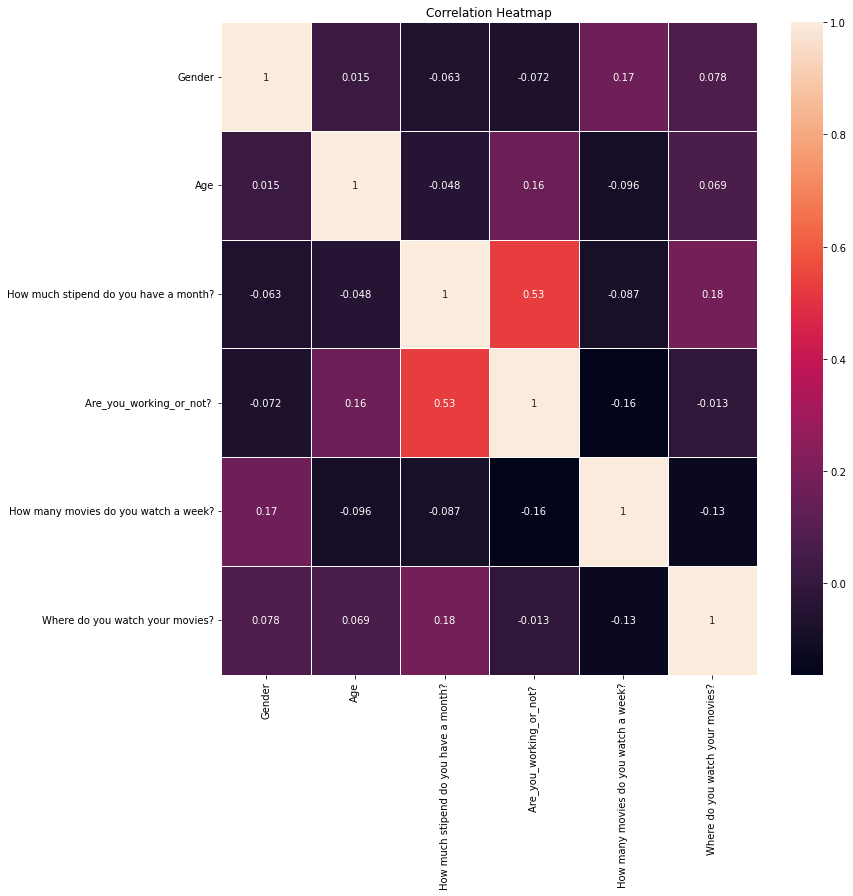

In [18]:
plt.figure(figsize=(12,12))
plt.title('Correlation Heatmap')
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()    

In [19]:
Correlation = df.corr()["Gender"].abs().sort_values(ascending = True)
Correlation

Age                                      0.015041
How much stipend do you have a month?    0.062826
Are_you_working_or_not?                  0.072497
Where do you watch your movies?          0.077892
How many movies do you watch a week?     0.166667
Gender                                   1.000000
Name: Gender, dtype: float64

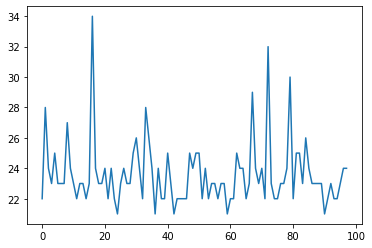

In [20]:
plt.plot(df["Age"].values)

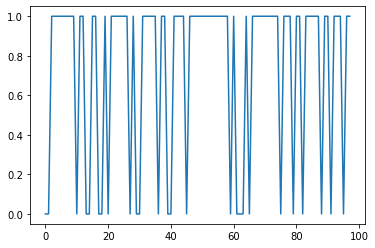

In [21]:
plt.plot(df["Gender"].values)

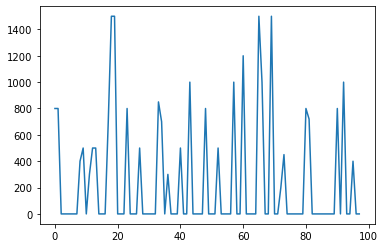

In [22]:
plt.plot(df["How much stipend do you have a month?"].values)

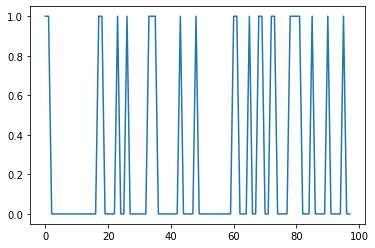

In [23]:
plt.plot(df["Are_you_working_or_not? "].values)

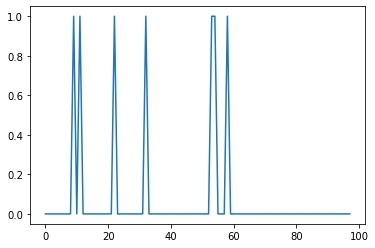

In [24]:
plt.plot(df["How many movies do you watch a week?"].values)

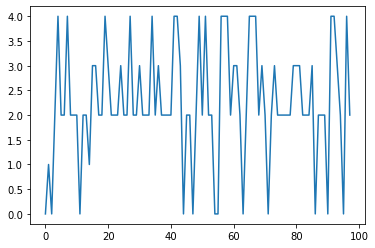

In [25]:
plt.plot(df["Where do you watch your movies?"].values)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
  

In [28]:
regr = LinearRegression()

In [29]:
regr.fit(X_train, Y_train)
print(regr.score(X_test, Y_test))

-0.12173111813356807


In [30]:
from sklearn import linear_model
clf = linear_model.PoissonRegressor()

In [31]:
from sklearn.metrics import mean_poisson_deviance

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)
y_new = log_reg.predict_proba(X_test)[::,1]

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)

print(confusion_matrix)

[[19  0]
 [ 1  0]]


In [34]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



In [35]:
log_reg.score(X_train, Y_train)

0.9230769230769231

In [36]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred, average='micro'))
print("Recall:",metrics.recall_score(Y_test, y_pred, average='micro'))

Accuracy: 0.95
Precision: 0.95
Recall: 0.95


In [38]:
predict = log_reg.predict([(0, 22.0,  800.0, 1, 0)])
predict

array([0.])

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=99999999)

X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)


forest = RandomForestRegressor()
_ = forest.fit(X_train_std, Y_train)
forest.score(X_test_std, Y_test)



0.022160201518726108